# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.metrics import mean_squared_error
from tensorflow.keras.metrics import mean_absolute_error

# Basic Functions

In [2]:
def plot_time_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


def trend(time, slope=0):
    return slope * time


def seasonal_pattern(season_time):
  return np.where(season_time < 0.1,
                  np.cos(season_time * 7 * np.pi),
                  1 / np.exp(5 * season_time))
  

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)


def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

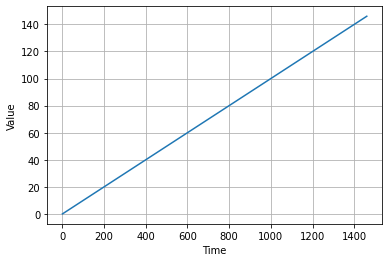

In [3]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10

series = trend(time, slope=0.1)  
plot_time_series(time, series)

# Create Time Series with Noise

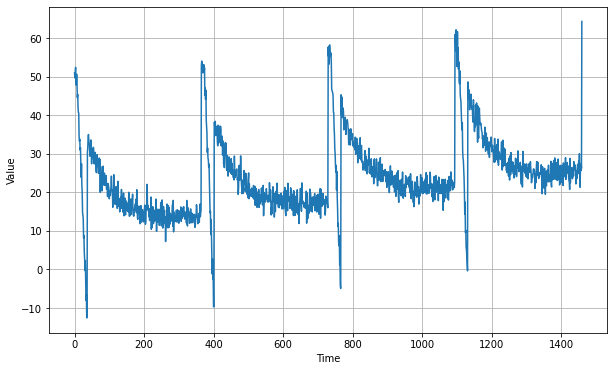

In [4]:
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2
period = 365

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_time_series(time, series)
plt.show()

# Splitting Time Series

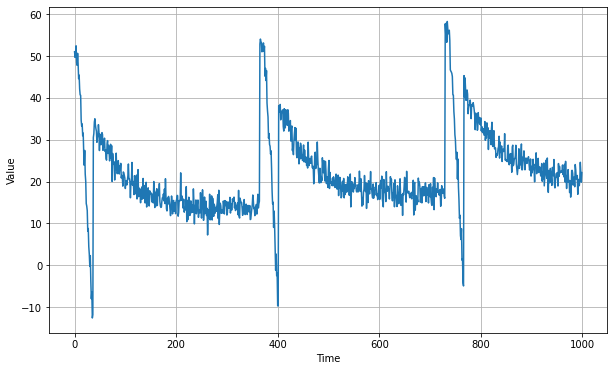

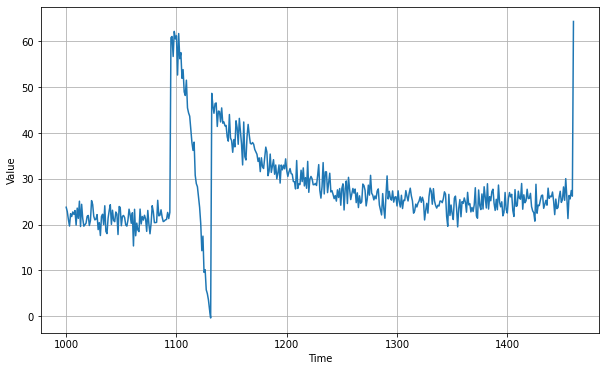

In [5]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10, 6))
plot_time_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid)
plt.show()

# Naive Forecast

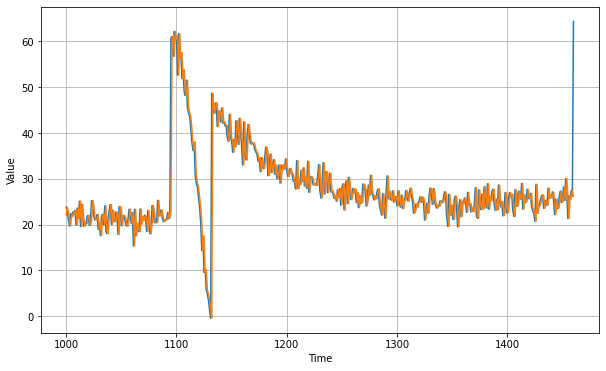

In [6]:
naive_forecast = series[split_time -1 : -1]

plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid)
plot_time_series(time_valid, naive_forecast)


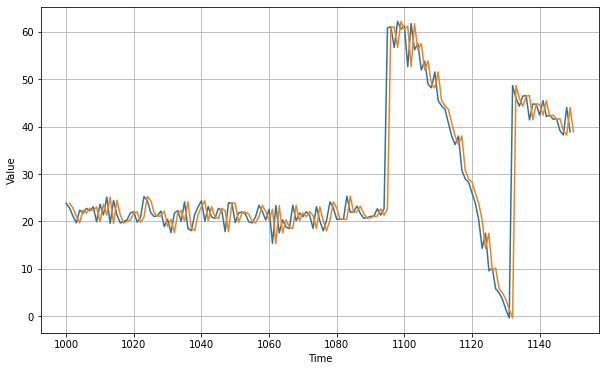

In [7]:
# ZOOM IT

plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid, start=0, end=150)
plot_time_series(time_valid, naive_forecast, start=1, end=151)

## Calculate Metrices

In [8]:
mse = mean_squared_error(x_valid, naive_forecast)
mae = mean_absolute_error(x_valid, naive_forecast)

print("MSE: ", mse)
print("MAE: ", mae)

MSE:  tf.Tensor(20.158268, shape=(), dtype=float32)
MAE:  tf.Tensor(2.5868618, shape=(), dtype=float32)


# Moving Average

In [9]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  
  forecast = []

  for time in range(len(series) - window_size):
    forecast.append(series[time : time + window_size].mean())
  
  return np.array(forecast)

In [10]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]
print(len(moving_avg))
moving_avg[:100]

461


array([20.62589 , 20.703863, 20.80436 , 20.74597 , 20.740244, 20.810658,
       20.957191, 21.041569, 21.240263, 21.410793, 21.319584, 21.350393,
       21.330774, 21.529354, 21.482548, 21.594667, 21.681425, 21.534294,
       21.440252, 21.430513, 21.454065, 21.472273, 21.567562, 21.580006,
       21.766043, 21.945913, 21.991827, 21.872765, 21.836452, 21.913998,
       21.806362, 21.694792, 21.520935, 21.542753, 21.628351, 21.54906 ,
       21.627373, 21.48573 , 21.345652, 21.290678, 21.396334, 21.421072,
       21.377737, 21.311861, 21.35593 , 21.229506, 21.276163, 21.364145,
       21.292501, 21.413599, 21.478754, 21.403736, 21.470026, 21.506353,
       21.382795, 21.232933, 21.161171, 21.159143, 21.231638, 21.229399,
       21.2754  , 21.34663 , 21.270693, 21.323484, 21.167278, 21.178345,
       21.001883, 21.000492, 21.178806, 21.136051, 21.092827, 20.981009,
       21.047058, 20.98401 , 20.904875, 20.986712, 20.898878, 20.755693,
       20.836401, 20.842253, 20.811243, 20.834097, 

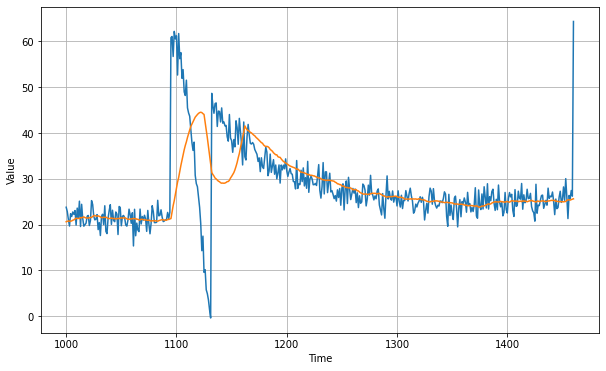

In [11]:
plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid)
plot_time_series(time_valid, moving_avg)

In [12]:
mse = mean_squared_error(x_valid, moving_avg)
mae = mean_absolute_error(x_valid, moving_avg)

print("MSE: ", mse)
print("MAE: ", mae)

MSE:  tf.Tensor(66.60637, shape=(), dtype=float32)
MAE:  tf.Tensor(4.0805964, shape=(), dtype=float32)


# Differencing

In [13]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

print(diff_time[:10])
print(diff_series[:10])

[365. 366. 367. 368. 369. 370. 371. 372. 373. 374.]
[1.8541336 4.37471   2.3798103 0.7992935 2.5722847 4.1672935 1.4875717
 5.017418  6.5074883 6.8712425]


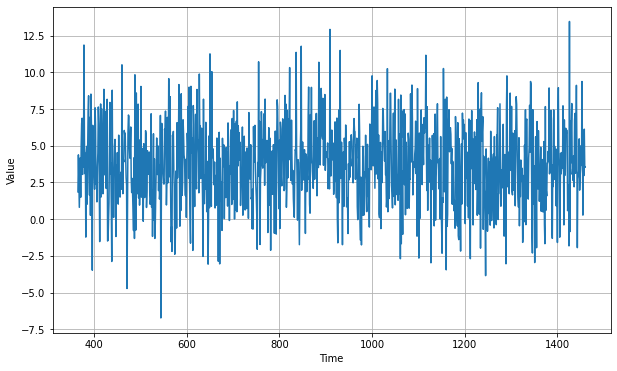

In [14]:
plt.figure(figsize=(10, 6))
plot_time_series(diff_time, diff_series)
plt.show()

# Differencing Moving Average

In [15]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]
diff_moving_avg[:50]

array([3.3915198, 3.5332665, 3.5048678, 3.5203888, 3.5215726, 3.5703473,
       3.557689 , 3.4939203, 3.5306   , 3.6232636, 3.635277 , 3.6527722,
       3.7045908, 3.7427619, 3.6782997, 3.7385712, 3.6452038, 3.5642538,
       3.518401 , 3.6056795, 3.5934806, 3.681973 , 3.6547582, 3.571337 ,
       3.6040604, 3.756626 , 3.8987815, 3.938045 , 4.05231  , 4.1169243,
       4.17194  , 4.1311245, 4.061938 , 4.0854564, 4.238532 , 4.184644 ,
       4.2124753, 4.205103 , 4.2004223, 4.2869134, 4.4477496, 4.5174356,
       4.5855885, 4.563501 , 4.554042 , 4.5801067, 4.5301313, 4.5906615,
       4.516632 , 4.5618906], dtype=float32)

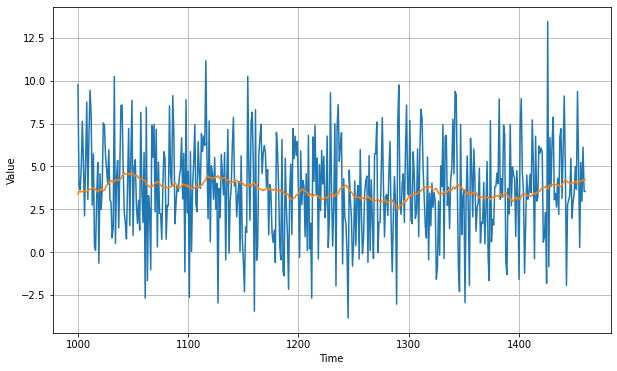

In [16]:
plt.figure(figsize=(10, 6))
plot_time_series(time_valid, diff_series[split_time - 365:])
plot_time_series(time_valid, diff_moving_avg)
plt.show()

# Add back Trend to Seasonality

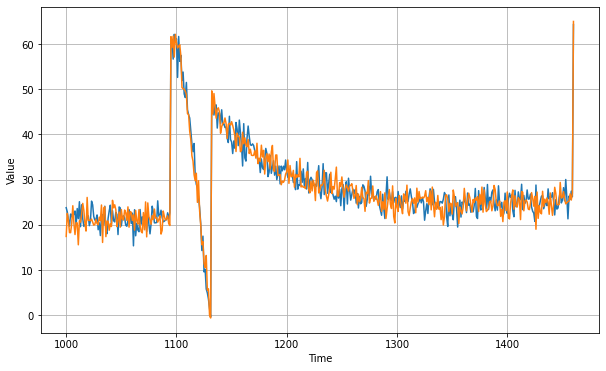

In [17]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid)
plot_time_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [18]:
mse = mean_squared_error(x_valid, diff_moving_avg_plus_past)
mae = mean_absolute_error(x_valid, diff_moving_avg_plus_past)

print("MSE: ", mse)
print("MAE: ", mae)

MSE:  tf.Tensor(8.475785, shape=(), dtype=float32)
MAE:  tf.Tensor(2.335724, shape=(), dtype=float32)


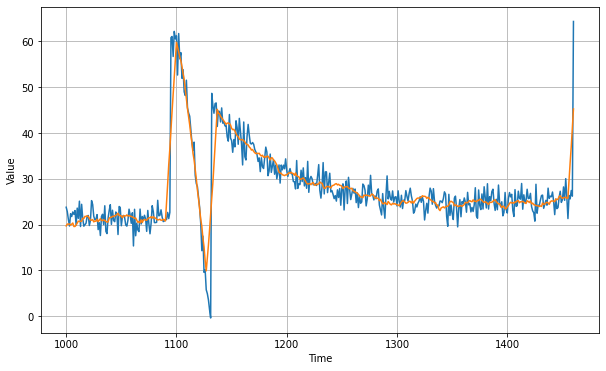

In [19]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid)
plot_time_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [20]:
mse = mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past)
mae = mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past)

print("MSE: ", mse)
print("MAE: ", mae)

MSE:  tf.Tensor(13.366834, shape=(), dtype=float32)
MAE:  tf.Tensor(2.2567513, shape=(), dtype=float32)
